# Start to end test

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
# os.environ["CUDA_VISIBLE_DEVICES"] = ""  # For CPU inference
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

Before runing this test, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [2]:
# Import all necessary libraries.
import numpy as np
import sys
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from termcolor import colored

plt.rcParams["figure.figsize"] = (10,10)

In [3]:
# NomeroffNet path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [4]:
from NomeroffNet.BBoxNpPoints import NpPointsCraft, getCvZoneRGB, convertCvZonesRGBtoBGR, reshapePoints
#from NomeroffNet.BBoxNpPoints import NpPointsCraft
npPointsCraft = NpPointsCraft()
npPointsCraft.load()

Loading weights from checkpoint (/var/www/nomeroff-net21/NomeroffNet/Base/mcm/./models/NpPointsCraft/mtl/craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (/var/www/nomeroff-net21/NomeroffNet/Base/mcm/./models/NpPointsCraft/refiner/craft_refiner_CTW1500_2020-02-16.pth)


In [5]:
from NomeroffNet.YoloV5Detector import Detector

detector = Detector()
detector.load()

In [6]:
from NomeroffNet.OptionsDetector import OptionsDetector

optionsDetector = OptionsDetector()
optionsDetector.load()

In [7]:
from NomeroffNet.TextDetector import TextDetector
textDetector = TextDetector({
    "eu_ua_2004_2015": {
        "for_regions": ["eu_ua_2015", "eu_ua_2004"],
        "model_path": "latest"
    },
    "eu_ua_1995": {
        "for_regions": ["eu_ua_1995"],
        "model_path": "latest"
    },
    "eu": {
        "for_regions": ["eu"],
        "model_path": "latest"
    },
    "ru": {
        "for_regions": ["ru", "eu-ua-fake-lnr", "eu-ua-fake-dnr"],
        "model_path": "latest" 
    },
    "kz": {
        "for_regions": ["kz"],
        "model_path": "latest"
    },
    "ge": {
        "for_regions": ["ge"],
        "model_path": "latest"
    },
    "su": {
        "for_regions": ["su"],
        "model_path": "latest"
    }
})

In [8]:
from turbojpeg import TurboJPEG
jpeg = TurboJPEG()

import cv2
import numpy as np

async def test(dirName, fname, y, min_bbox_acc = 0.5, verbose=0):
    nGood = 0
    nBad  = 0
    img_path = os.path.join(dirName, fname)
    if verbose==1:
        print(colored(f"__________ \t\t {img_path} \t\t __________", "blue"))
        
    #print(os.path.isfile(img_path))
    #img = cv2.imread(img_path)
    with open(img_path, 'rb') as in_file:
        img = jpeg.decode(in_file.read())
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    targetBoxes = detector.detect_bbox(img)
    
    all_points = npPointsCraft.detect(img, targetBoxes,[3,1,0])
    # for  images/14.jpeg bug
    all_points = [ps for ps in all_points if len(ps)]
    
#     print('all_points')
#     print(all_points)
#     # cut zones
    toShowZones = [getCvZoneRGB(img, reshapePoints(rect, 1)) for rect in all_points]
    zones = convertCvZonesRGBtoBGR(toShowZones)            

#     toShowZones = [getCvZoneRGB(img, rect) for rect in all_points]
#     zones = convertCvZonesRGBtoBGR(toShowZones)    

#     # find standart
#     regionIds, countLines = optionsDetector.predict(zones)
#     regionNames = optionsDetector.getRegionLabels(regionIds)
#     print(regionNames)
#     print(countLines)
    
#     for zone, points in zip(toShowZones, all_points):
#         plt.axis("off")
#         plt.imshow(zone)
#         plt.show()

#     # find text with postprocessing by standart  
#     textArr = textDetector.predict(zones, regionNames, countLines)
#     print(textArr)
    
     # draw rect and 4 points
    for targetBox, points in zip(targetBoxes, all_points):
    #for targetBox in targetBoxes:
        # draw 
        cv2.rectangle(img, 
                      (int(targetBox[0]), int(targetBox[1])), 
                      (int(targetBox[2]), int(targetBox[3])), 
                      (0,120,255), 
                      3)
        #print(points, points.shape)
        cv2.polylines(img, np.array([points], np.int32), True, (255,120,255),3)
    plt.imshow(img)
    plt.show()

#     for yText in y:
#         if yText in textArr:
#             print(colored(f"OK: TEXT:{yText} \t\t\t RESULTS:{textArr} \n\t\t\t\t\t in PATH:{img_path}", 'green'))
#             nGood += 1
#         else:
#             print(colored(f"NOT OK: TEXT:{yText} \t\t\t RESULTS:{textArr} \n\t\t\t\t\t in PATH:{img_path} ", 'red'))
#             nBad += 1
    return nGood, nBad

In [9]:
dirName = "./bad"

392071890.jpeg
__________ 		 ./bad/392071890.jpeg 		 __________


/var/www/nomeroff-net21/NomeroffNet/../CRAFT-pytorch/craft_utils.py:239: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  polys = np.array(polys)


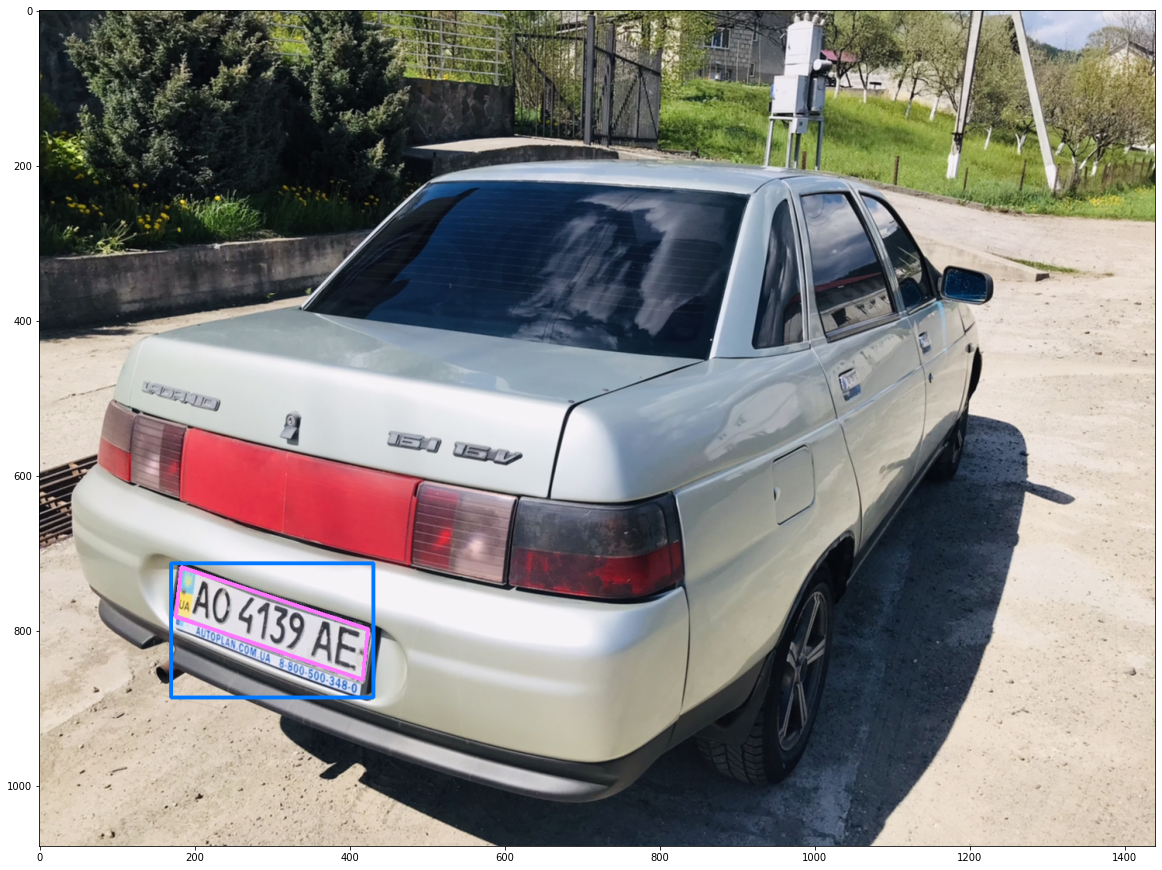

389501740.jpeg
__________ 		 ./bad/389501740.jpeg 		 __________


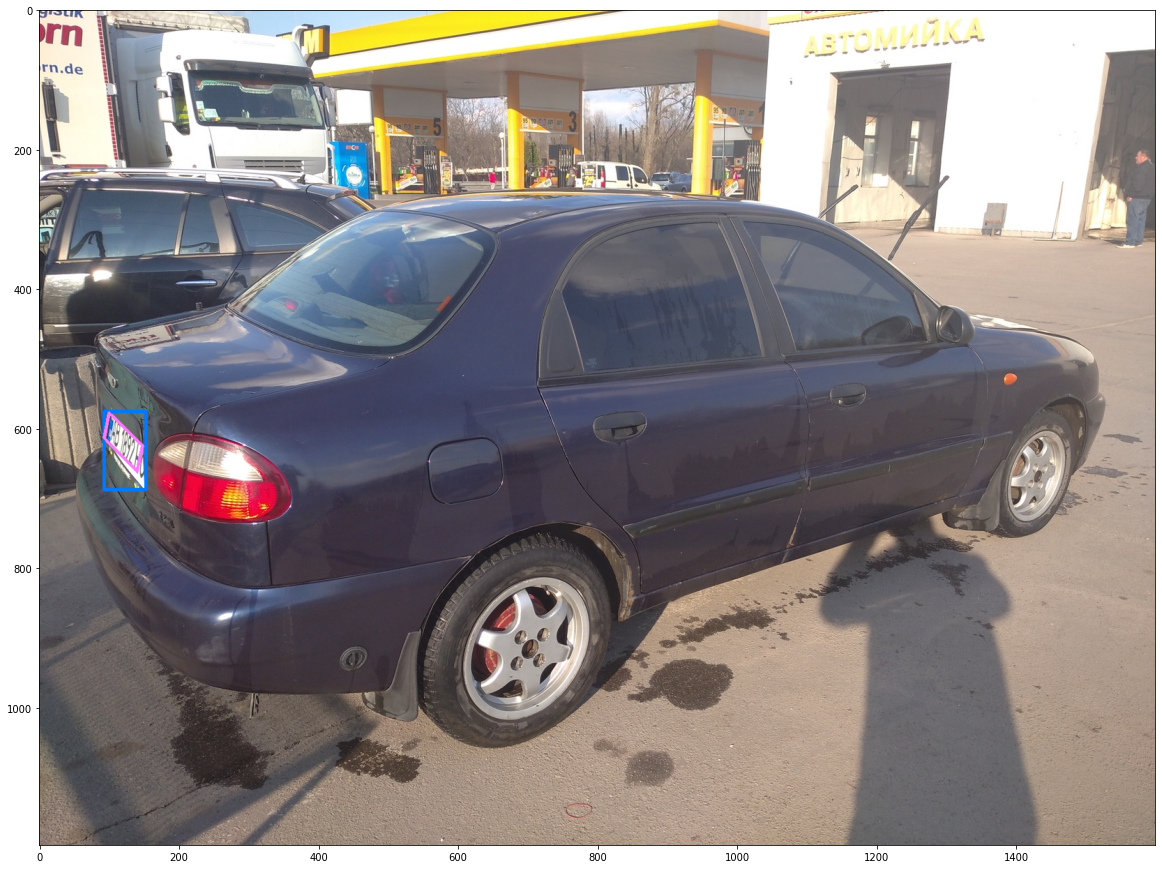

ZeroDivisionError: division by zero

In [10]:
# testData = {
#     "394415685.jpeg": ["XXXXXXXX"],
#     "394421044.jpeg": ["XXXXXXXX"],
#     "392071890.jpeg": ["AI5255EI"],
#     "389446111.jpeg": ["AI5255EI"],
#     "389450152.jpeg": ["AT6883CM"],
#     "389450518.jpeg": ["XXXXXXXX"],
#     "389455303.jpeg": ["XXXXXXXX"],
#     "389455319.jpeg": ["XXXXXXXX"],
#     "389456262.jpeg": ["XXXXXXXX"],
#     "389457195.jpeg": ["XXXXXXXX"],
#     "389463280.jpeg": ["XXXXXXXX"],
#     "389471810.jpeg": ["XXXXXXXX"],
#     "389472813.jpeg": ["XXXXXXXX"],
#     "389474588.jpeg": ["XXXXXXXX"],
#     "389475903.jpeg": ["XXXXXXXX"],
#     "389478554.jpeg": ["XXXXXXXX"],
#     "389479890.jpeg": ["XXXXXXXX"],
#     "389486478.jpeg": ["XXXXXXXX"],
#     "389487062.jpeg": ["XXXXXXXX"],
#     "389488009.jpeg": ["XXXXXXXX"],
#     "389492349.jpeg": ["XXXXXXXX"],
#     "389492552.jpeg": ["XXXXXXXX"],
#     "389493017.jpeg": ["XXXXXXXX"],
#     "389493199.jpeg": ["XXXXXXXX"],
#     "389498047.jpeg": ["XXXXXXXX"],
#     "389498048.jpeg": ["XXXXXXXX"],
#     "389501740.jpeg": ["XXXXXXXX"],
#     "389501881.jpeg": ["XXXXXXXX"],
#     "389505857.jpeg": ["XXXXXXXX"],
#     "389506348.jpeg": ["XXXXXXXX"],
#     "389506413.jpeg": ["XXXXXXXX"],
#     "389508412.jpeg": ["XXXXXXXX"],
#     "389509188.jpeg": ["XXXXXXXX"],
#     "389509692.jpeg": ["XXXXXXXX"],
#     "389510776.jpeg": ["XXXXXXXX"],
#     "389514369.jpeg": ["XXXXXXXX"],
#     "389515953.jpeg": ["XXXXXXXX"],
#     "389516273.jpeg": ["XXXXXXXX"],
#     "389516346.jpeg": ["XXXXXXXX"],
#     "389517838.jpeg": ["XXXXXXXX"],
#     "389519325.jpeg": ["XXXXXXXX"],
#     "389520944.jpeg": ["XXXXXXXX"]
# }

testData = {
    "392071890.jpeg": ["AI5255EI"],
    "389501740.jpeg": ["XXXXXXXX"]
}



%matplotlib inline
plt.rcParams["figure.figsize"]  = (20, 20)    

gGood = 0
gBad = 0
i = 0
for fileName in testData.keys():
    print(fileName)
    nGood, nBad = await test(dirName, fileName, testData[fileName], verbose=1)
    gGood += nGood
    gBad += nBad
    i += 1
total = gGood + gBad
print(f"TOTAL GOOD: {gGood/total}")
print(f"TOTAL BED: {gBad/total}")

In [ ]:
# print(math.radians(90))
# math.degrees(1.5707963267948966)
# math.atan(k)

In [ ]:
# import math
# r = math.atan(math.inf)
# print(math.degrees(r))


In [ ]:
# round(-89.99999316981062,2)